In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants as const
from scipy import optimize
from pytablewriter import MarkdownTableWriter
import copy

import utils
from rates import XuCH3ORate, XuCH3OReverseRate, XuH2COHRate, XuH2COHReverseRate

## H + H2CO (+ M) <=> CH3O (+ M)

In [5]:
r1 = utils.ReactionExplorer('thermodata121_test.yaml')
xu = XuCH3ORate()

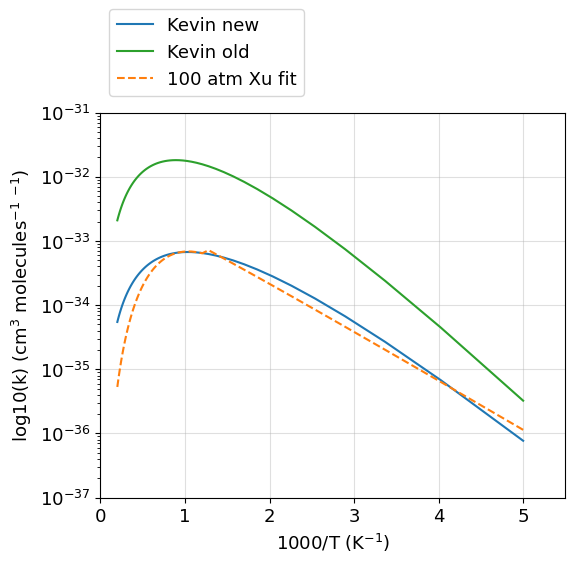

In [6]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['k0_f']
ax.plot(1000.0/T, k1,label='Kevin new',c='C0',ls='-')

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[1]['k0_f']
ax.plot(1000.0/T, k1,label='Kevin old',c='C2',ls='-')

n = 1e6*P/(const.k*1e7*T)
k = np.array([xu.rate_1atm(T1) for T1 in T])/n
ax.plot(1000/T, k,label='100 atm Xu fit',c='C1',ls='--')

ax.set_xlim(0,5.5)
ax.set_ylim(1e-37,1e-31)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (cm$^{3}$ molecules$^{-1}$ $^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/low_pressure_H+H2CO+M=CH3O+M.pdf',bbox_inches='tight')
plt.show()

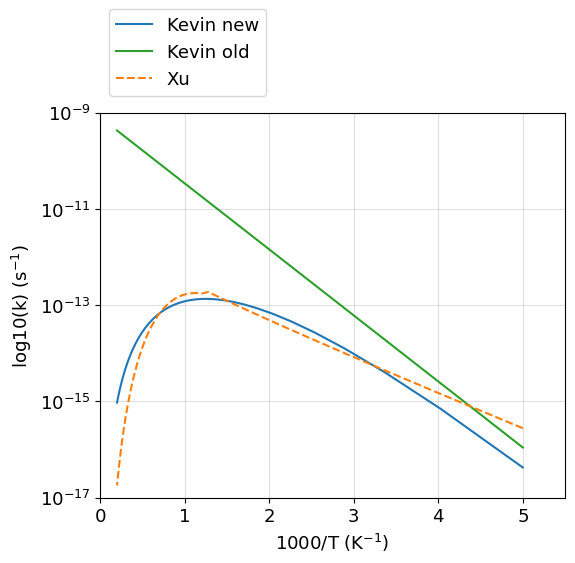

In [7]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['kinf_f']
ax.plot(1000.0/T, k1,label='Kevin new',c='C0',ls='-')

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[1]['kinf_f']
ax.plot(1000.0/T, k1,label='Kevin old',c='C2',ls='-')

k = np.array([xu.rate_100atm(T1) for T1 in T])
ax.plot(1000/T, k,label='Xu',c='C1',ls='--')

ax.set_xlim(0,5.5)
ax.set_ylim(1e-17,1e-9)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (s$^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/high_pressure_H+H2CO+M=CH3O+M.pdf',bbox_inches='tight')
plt.show()

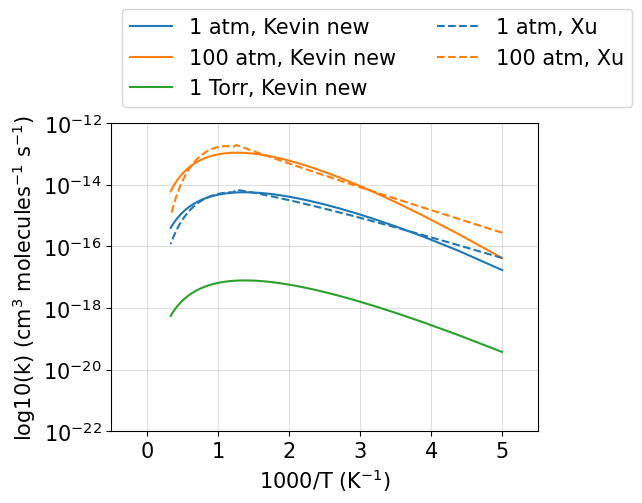

In [8]:
T = np.linspace(200,3000,100)

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[5.5,4])

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['k_f']
ax.plot(1000.0/T, k1,label='1 atm, Kevin new',c='C0',ls='-')

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['k_f']
ax.plot(1000.0/T, k1,label='100 atm, Kevin new',c='C1',ls='-')

P = 0.00133322
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['k_f']
ax.plot(1000.0/T, k1,label='1 Torr, Kevin new',c='C2',ls='-')

####

k = np.array([xu.rate_1atm(T1) for T1 in T])
ax.plot(1000/T, k,ls='--',c='C0',label='1 atm, Xu')

k = np.array([xu.rate_100atm(T1) for T1 in T])
ax.plot(1000/T, k,ls='--',c='C1',label='100 atm, Xu')

ax.set_yscale('log')
ax.set_xlim(-0.5,5.5)
ax.set_ylim(1e-22,1e-12)
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (cm$^{3}$ molecules$^{-1}$ s$^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=2,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/Figure10_Xu2015_fit_H+H2CO+M=CH3O+M.pdf',bbox_inches='tight')
plt.show()

## H + H2CO (+ M) <=> H2COH (+ M)

In [9]:
xu = XuH2COHRate()

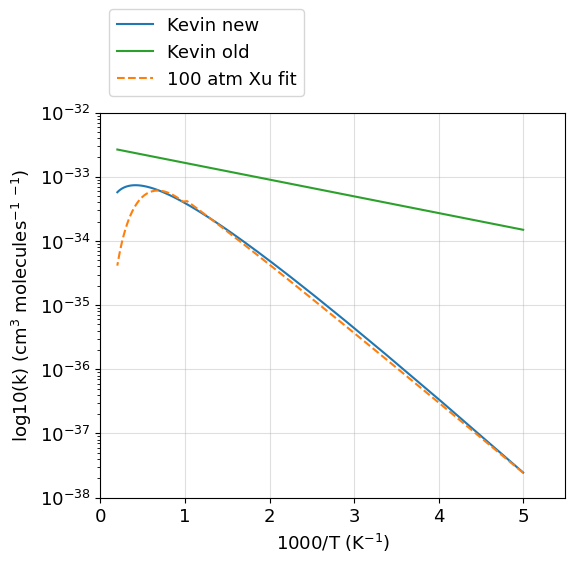

In [10]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['k0_f']
ax.plot(1000.0/T, k1,label='Kevin new',c='C0',ls='-')

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[3]['k0_f']
ax.plot(1000.0/T, k1,label='Kevin old',c='C2',ls='-')

n = 1e6*P/(const.k*1e7*T)
k = np.array([xu.rate_1atm(T1) for T1 in T])/n
ax.plot(1000/T, k,label='100 atm Xu fit',c='C1',ls='--')

ax.set_xlim(0,5.5)
ax.set_ylim(1e-38,1e-32)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (cm$^{3}$ molecules$^{-1}$ $^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/low_pressure_H+H2CO+M=H2COH+M.pdf',bbox_inches='tight')
plt.show()

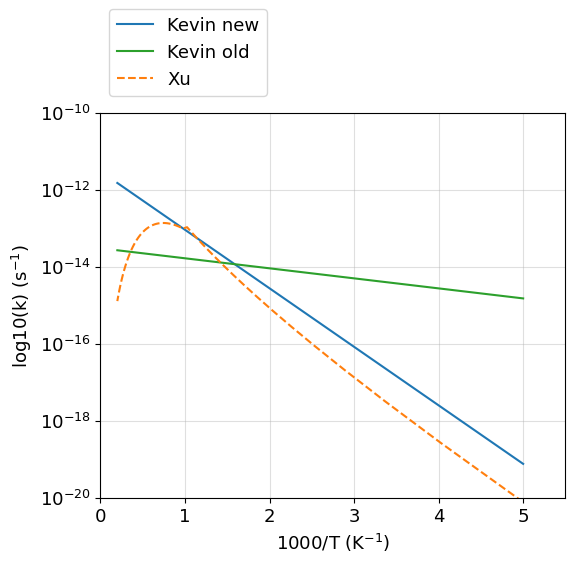

In [11]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['kinf_f']
ax.plot(1000.0/T, k1,label='Kevin new',c='C0',ls='-')

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[3]['kinf_f']
ax.plot(1000.0/T, k1,label='Kevin old',c='C2',ls='-')

k = np.array([xu.rate_100atm(T1) for T1 in T])
ax.plot(1000/T, k,label='Xu',c='C1',ls='--')

ax.set_xlim(0,5.5)
ax.set_ylim(1e-20,1e-10)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (s$^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/high_pressure_H+H2CO+M=H2COH+M.pdf',bbox_inches='tight')
plt.show()

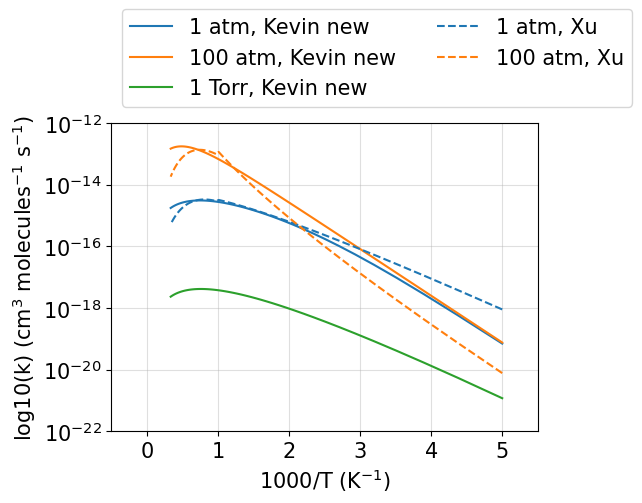

In [12]:
T = np.linspace(200,3000,100)

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,1,figsize=[5.5,4])

####

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['k_f']
ax.plot(1000.0/T, k1,label='1 atm, Kevin new',c='C0',ls='-')

P = 100.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['k_f']
ax.plot(1000.0/T, k1,label='100 atm, Kevin new',c='C1',ls='-')

P = 0.00133322
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['k_f']
ax.plot(1000.0/T, k1,label='1 Torr, Kevin new',c='C2',ls='-')

####

k = np.array([xu.rate_1atm(T1) for T1 in T])
ax.plot(1000/T, k,ls='--',c='C0',label='1 atm, Xu')

k = np.array([xu.rate_100atm(T1) for T1 in T])
ax.plot(1000/T, k,ls='--',c='C1',label='100 atm, Xu')

ax.set_yscale('log')
ax.set_xlim(-0.5,5.5)
ax.set_ylim(1e-22,1e-12)
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (cm$^{3}$ molecules$^{-1}$ s$^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=2,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/Figure9_Xu2015_fit_H+H2CO+M=H2COH+M.pdf',bbox_inches='tight')
plt.show()

## reverse of both reactions

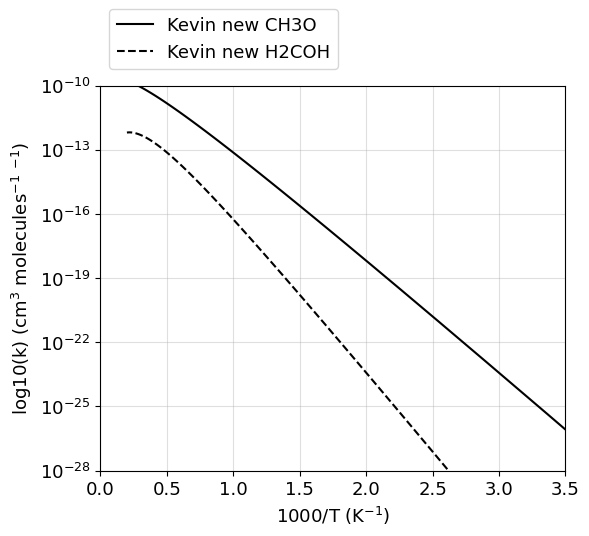

In [13]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['k0_r']
ax.plot(1000.0/T, k1,label='Kevin new CH3O',c='k',ls='-')

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['k0_r']
ax.plot(1000.0/T, k1,label='Kevin new H2COH',c='k',ls='--')

ax.set_xlim(0,3.5)
ax.set_ylim(1e-28,1e-10)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (cm$^{3}$ molecules$^{-1}$ $^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/Figure13_Xu2015_low_pressure.pdf',bbox_inches='tight')
plt.show()

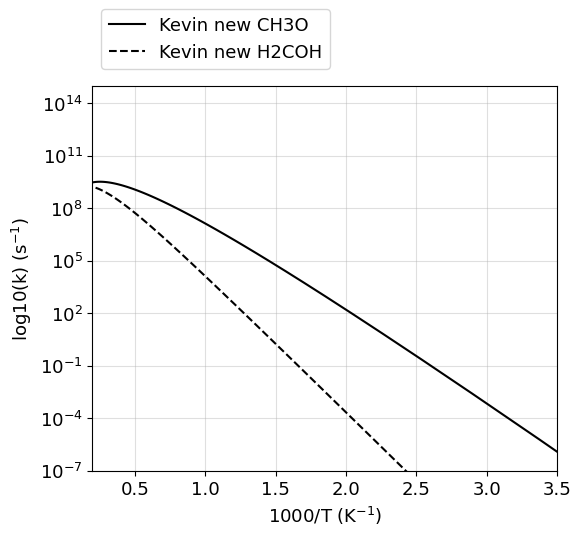

In [14]:
T = np.linspace(200,5000,100)

plt.rcParams.update({'font.size': 13})
fig,ax = plt.subplots(1,1,figsize=[6,5])

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[0]['kinf_r']
ax.plot(1000.0/T, k1,label='Kevin new CH3O',c='k',ls='-')

P = 1.0*1.01325
k1 = np.empty(T.shape[0])
for i,T1 in enumerate(T):
    tmp  = r1.evaluate_rates(T1, P)
    k1[i] = tmp[2]['kinf_r']
ax.plot(1000.0/T, k1,label='Kevin new H2COH',c='k',ls='--')

ax.set_xlim(0.2,3.5)
ax.set_ylim(1e-7,1e15)
ax.set_yscale('log')
ax.grid(alpha=0.4)
ax.set_ylabel('log10(k) (s$^{-1}$)')
ax.set_xlabel('1000/T (K$^{-1}$)')
ax.legend(ncol=1,bbox_to_anchor=(0, 1.02), loc='lower left')

plt.savefig('figures/Figure14_Xu2015_high_pressure.pdf',bbox_inches='tight')
plt.show()

In [15]:
P,T = 1,298
species = ['H','H2CO','CH3O','H2COH']

labels = ['species','enthalpy (kJ/mol)','entropy (J/mol/K)']
value_matrix = []
for sp in species:
    value = []
    value.append(sp)
    tmp = '%.1f'%(r1.enthalpy(sp,T)/1e3)
    value.append(tmp)
    tmp = '%.1f'%(r1.entropy(sp,T))
    value.append(tmp)
    value_matrix.append(value)
    
    
writer = MarkdownTableWriter(
    table_name="T = 298 K thermodynamics",
    headers=labels,
    value_matrix=value_matrix,
)
writer.write_table()

# T = 298 K thermodynamics
|species|enthalpy (kJ/mol)|entropy (J/mol/K)|
|-------|----------------:|----------------:|
|H      |            218.0|            114.7|
|H2CO   |           -108.9|            218.9|
|CH3O   |             21.6|            234.0|
|H2COH  |            -15.3|            244.0|
